<img src="https://raw.githubusercontent.com/QISKit/qiskit-tutorial/6c976540defef15779a79ba06d4a9d0583b030ff/images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## Notebook $n$: <br> IBM Q Experience Basics - The Grover Algorithm (local)

This noteboks contains the basics interacting with the IBM Q Experience via their API:
- How to connect using the API Token

***
### Author
[Rodolfo Ferro](https://github.com/RodolfoFerro/)

<br><br>
## Load the QISKit SDK

In [1]:
# Import the QISKit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute

# Import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Create of a Quantum Circuit

In [2]:
# Create a Quantum Register with the number of qubits:
q = QuantumRegister(3)

# Create a Classical Register with the number of measures:
c = ClassicalRegister(3)

# Initialize the Quatum Circuit with the previous registers:
qc = QuantumCircuit(q, c)

# Set initial state of the circuit:
qc.x(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[0])

# Apply AND operator:
qc.h(q[0])
qc.cx(q[1], q[0])
qc.tdg(q[0])
qc.cx(q[2], q[0])
qc.t(q[0])
qc.cx(q[1], q[0])
qc.tdg(q[0])
qc.cx(q[2], q[0])
qc.t(q[0])
qc.tdg(q[1])
qc.h(q[0])
qc.cx(q[2], q[1])
qc.tdg(q[1])
qc.cx(q[2], q[1])
qc.s(q[1])
qc.t(q[2])

# Apply Grover operator:
qc.h(q[1])
qc.h(q[2])
qc.x(q[1])
qc.x(q[2])
qc.h(q[1])
qc.cx(q[2], q[1])
qc.h(q[1])
qc.x(q[1])
qc.x(q[2])
qc.h(q[1])
qc.h(q[2])

# Measure registers:
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

## Setup local simulator

In [3]:
# See a list of available local simulators
print("Local backends: ")
for backend in available_backends({'local': True}):
    print("· '{}'".format(backend))

Local backends: 
· 'local_clifford_simulator'
· 'local_unitary_simulator'
· 'local_qasm_simulator'
· 'local_statevector_simulator'


## Compile and run simulation

In [4]:
# Compile and run the Quantum circuit on a simulator backend
job_sim = execute(qc, "local_qasm_simulator")
sim_result = job_sim.result()

## Showing the results

In [5]:
# Show the results
print("Simulation status: ", sim_result)
print("Simulation results:")
for key, val in sim_result.get_counts(qc).items():
    print("· State '{}': {} times from 1024 runs.".format(key, val))

Simulation status:  COMPLETED
Simulation results:
· State '110': 1024 times from 1024 runs.


## Plotting the results

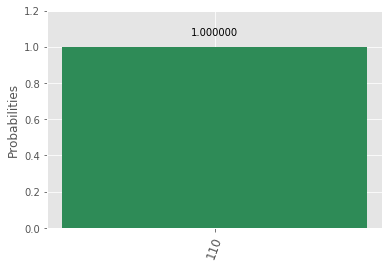

You have made entanglement!


In [6]:
# Plot the results:
plot_histogram(sim_result.get_counts(qc))
print('You have made entanglement!')

## Plotting the circuit

The circuit that was run on the machine is:

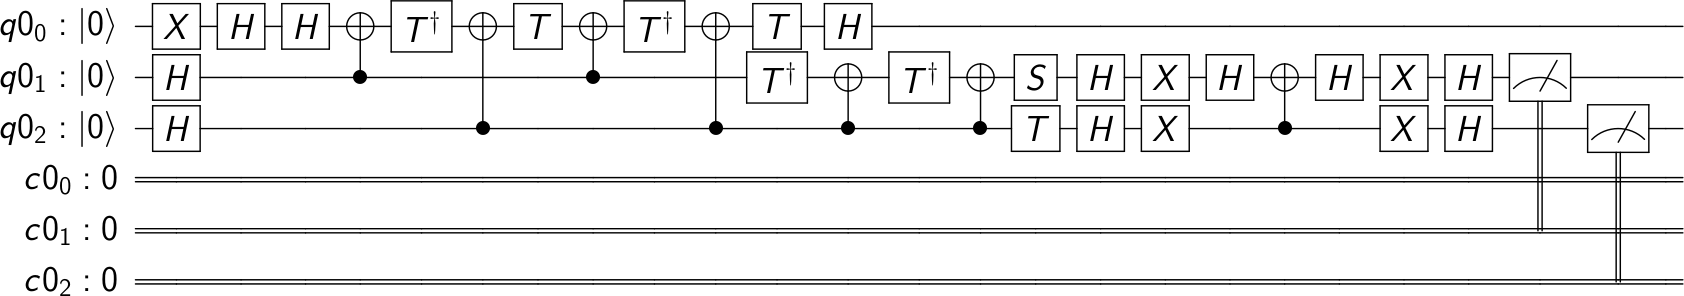

In [7]:
circuit_drawer(qc)